In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
from scipy.stats import norm
import datetime as dt
import seaborn as sns
import yfinance as yf
from scipy.stats import t

# Question 1

In [2]:
# Load the database

df = pd.read_csv('spy_gfc.csv')

n = df.shape[0]
m = df.shape[1]

In [3]:
# Calculate the rate of return of adjClose price
adj_r = np.zeros((n-1, 1))

for i in range(n-1):
    adj_r[i] = (df['AdjClose'][i+1] - df['AdjClose'][i]) / df['AdjClose'][i]

In [4]:
# Calculate the expect mean and standard deviation
exp_mean = df['AdjClose'].mean()
exp_std = df['AdjClose'].std()

print("The expected mean of AdjClose price is %f." % exp_mean) 
print("The expected standard deviation of AdjClose price is %f." % exp_std)

The expected mean of AdjClose price is 70.495078.
The expected standard deviation of AdjClose price is 11.174723.


In [5]:
# Simulate return
nsim = 1000
np.random.seed(1998)
r = np.random.normal(loc=0.0, scale=adj_r.std(), size=(n-1, nsim))

rate = np.zeros((n, nsim))
for i in range(nsim):
    temp_list = r[:,i].tolist()
    temp_list.insert(0,0)
    rate[:,i] = np.array(temp_list)

In [6]:
# Classical Brownian Motion
initial = exp_mean

mean_classical = np.zeros((nsim,1))
std_classical = np.zeros((nsim,1))

for i in range(nsim):
    temp_price = np.zeros((n,1))
    temp_price[0] = initial
    
    for j in range(1, n):
        temp_price[j] = temp_price[j-1] + rate[j][i]
        
    mean_classical[i] = temp_price.mean()
    std_classical[i] = temp_price.std()
     
mean_classical_result = mean_classical.mean()
std_classical_result = std_classical.mean()

print("Using classical Brownian Motion, the mean is %f" % mean_classical_result)
print("Using classical Brownian Motion, the standard deviation is %f" % std_classical_result)

Using classical Brownian Motion, the mean is 70.486780
Using classical Brownian Motion, the standard deviation is 0.164435


In [7]:
# Arithmetic Return System
mean_arithmetic = np.zeros((nsim,1))
std_arithmetic = np.zeros((nsim,1))

for i in range(nsim):
    temp_price = np.zeros((n,1))
    temp_price[0] = initial
    
    for j in range(1, n):
        temp_price[j] = temp_price[j-1] * (1 + rate[j][i])
        
    mean_arithmetic[i] = temp_price.mean()
    std_arithmetic[i] = temp_price.std()
        
mean_arithmetic_result = mean_arithmetic.mean()
std_arithmetic_result = std_arithmetic.mean()

print("Using arithmetic return system, the mean is %f" % mean_arithmetic_result)
print("Using arithmetic return system, the standard deviation is %f" % std_arithmetic_result)

Using arithmetic return system, the mean is 69.910269
Using arithmetic return system, the standard deviation is 11.498816


In [8]:
# Log Return
mean_log = np.zeros((nsim,1))
std_log = np.zeros((nsim,1))

for i in range(nsim):
    temp_price = np.zeros((n,1))
    temp_price[0] = initial
    
    for j in range(1, n):
        temp_price[j] = temp_price[j-1] * math.exp(rate[j][i])
        
    mean_log[i] = temp_price.mean()
    std_log[i] = temp_price.std()
        
mean_log_result = mean_log.mean()
std_log_result = std_log.mean()

print("Using log return, the mean is %f" % mean_log_result)
print("Using log return, the standard deviation is %f" % std_log_result)

Using log return, the mean is 73.205159
Using log return, the standard deviation is 12.128027


In [9]:
# Create the table to show the difference between each method with expected value
diff_classical_mean = mean_classical_result - exp_mean
diff_classical_std = std_classical_result - exp_std
diff_arithmetic_mean = mean_arithmetic_result - exp_mean
diff_arithmetic_std = std_arithmetic_result - exp_std
diff_log_mean = mean_log_result - exp_mean
diff_log_std = std_log_result - exp_std

name = ['Classical Brownian Motion', 'Arithmetic Return System', 'Log Return']
diff_mean = [diff_classical_mean, diff_arithmetic_mean, diff_log_mean]
diff_std = [diff_classical_std, diff_arithmetic_std, diff_log_std]

result = pd.DataFrame(list(zip(name,diff_mean,diff_std)), columns = ['Method','Difference of Mean', 'Differenece of Std'])
result

,Method,Difference of Mean,Differenece of Std
0,Classical Brownian Motion,-0.008298,-11.010289
1,Arithmetic Return System,-0.584809,0.324093
2,Log Return,2.710081,0.953304


# Question 2

In [10]:
# Create the calulate function to decide which method to choice. *Vector is a vector, not matrix

def return_calculate (method, vector):
    n = vector.shape[0]
    ror = np.zeros((n-1, 1))
    
    if method == 'Classical':
        for i in range(1, n):
            ror[i-1] = vector[i] - vector[i-1]
            
    if method == 'Arithmetic':
        for i in range(1, n):
            ror[i-1] = (vector[i] / vector[i-1]) - 1
            
    if method == 'Log':
        for i in range(1,n):
            ror[i-1] = np.log(vector[i] / vector[i-1])
            
    return ror

In [11]:
df2 = pd.read_csv("DailyPrices.csv")
df2 = df2.drop(columns = ['Date'])

In [12]:
# Function of remove mean for a vector
def rm_mean (vector):
    mean = vector.mean()
    n = vector.shape[0]
    for i in range(n):
        vector[i] = vector[i] - mean
        
    return vector

In [13]:
# Calculate the arithmetic returns for INTC removing the mean
INTC = rm_mean(df2['INTC'])
ror_INTC = return_calculate('Arithmetic', INTC)
print("The Arithmetic return for INTC is:")
print(ror_INTC)

The Arithmetic return for INTC is:
[[ 1.59002377e-01]
 [-1.42415414e+00]
 [ 2.56686356e-02]
 [ 5.65622771e-01]
 [ 1.24688221e-01]
 [-5.40117350e-02]
 [-2.76458243e-01]
 [-2.28423616e-01]
 [-1.66865164e-01]
 [-3.42422286e-01]
 [-2.65146242e-01]
 [-8.21248888e-01]
 [-4.74503887e+00]
 [-7.03895697e-01]
 [-2.98849495e+00]
 [ 7.85597187e-01]
 [ 4.20830313e-01]
 [-1.34609075e-02]
 [-3.95760377e-01]
 [ 8.58239617e-01]
 [ 6.68473373e-01]
 [ 1.16552693e-01]
 [-2.02249352e-01]
 [ 5.97009461e-01]
 [-3.37981324e-01]
 [ 7.58061602e-01]
 [-5.36790477e-01]
 [ 7.59900327e-01]
 [ 3.23841046e-01]
 [-3.66932677e-01]
 [ 1.61002736e-01]
 [-9.65183016e-01]
 [-2.51724452e+01]
 [-5.40458024e-01]
 [-1.82149074e+00]
 [-1.92050531e-01]
 [ 1.27493588e+00]
 [ 2.84962170e-01]
 [-7.17046449e-01]
 [-4.18014639e-01]
 [ 9.42702801e-01]
 [ 2.35691276e+00]
 [-8.05359311e-01]
 [-7.07295842e-01]
 [-4.10789820e+00]
 [ 2.44913335e+00]
 [-2.02878970e-01]
 [ 9.89827093e-02]
 [-1.15795561e-01]
 [-3.49228961e-01]
 [ 3.82352235e+

#### Calculate VaR by different methods

In [14]:
# 1. Using normal distribution
df2 = pd.read_csv("DailyPrices.csv")
df2 = df2.drop(columns = ['Date'])
# Set equal weight
m1 = df2.shape[1]
weight1 = np.zeros((m1,1))
for i in range(m1):
    weight1[i] = 1/101

    
    
def ror_matrix (data):
    n = data.shape[0]
    m = data.shape[1]
    ror = np.zeros((n-1, m))
    for i in range(m):
        for j in range(n-1):
            ror[j][i] = (data.iat[j+1,i] - data.iat[j,i]) / data.iat[j,i]
    return ror 
ror1 = ror_matrix(df2)

cov1 = np.cov(ror1.T)

def cal_mean (data):
    n = data.shape[0]
    m = data.shape[1]
    avg = np.zeros((m,1))
    for i in range(m):
        avg[i] = data[:,i].mean()
    return avg 
avg_ror1 = cal_mean(ror1)

port1_mean = avg_ror1.T @ weight1
port1_std = np.sqrt(weight1.T @ cov1 @ weight1)
    
confidence_level = 0.05
VaR1 = norm.ppf(confidence_level, port1_mean, port1_std)    

print('The VaR value by using normal distribution is %f.' % VaR1)

The VaR value by using normal distribution is -0.012997.


In [15]:
# 2. Using normal distribution with an exponentially weight variance (lambda = 0.94)
df2 = pd.read_csv("DailyPrices.csv")
df2 = df2.drop(columns = ['Date'])
weights = np.full((101,1), 1/101)

def ewm (x, exp_w, lamda):
    w = []
    sum_w = 0
    n = x.shape[1]
    for i in range(1, len(x.index)+1):
        w.append((1-lamda)*lamda**(i-1))
        sum_w = sum_w + w[i-1]
    for i in range(len(x.index)):   
        exp_w.append(w[i] / sum_w)
    cov_matrix = np.zeros([n,n])
    for i in range (len(x.index)):
        for j in range (n):
            x.iloc[i,j] = x.iloc[i,j] - np.mean(x.iloc[:,j])     
    for i in range (n):
        for j in range (n):
            temp = exp_w * x.iloc[:,i]
            cov_matrix[i,j] = np.dot(temp, x.iloc[:, j])     
    return cov_matrix


returns_dp = df2.pct_change()
returns_dp = returns_dp.iloc[1:, :]

exp_w = []
ewm_cov_dp = ewm(returns_dp, exp_w, 0.94)
ewm_std_dp = np.sqrt(weights.T @ ewm_cov_dp @ weights)

for i in range(len(returns_dp)):
    for j in range(len(returns_dp.columns)):
        returns_dp.iloc[i][j] *= exp_w[i]

ewm_avg_dp = returns_dp.mean()
ewm_mean_dp = ewm_avg_dp @ weights    
        
alpha = 0.05
VaR2 = norm.ppf(alpha, ewm_mean_dp[0], ewm_std_dp[0][0])
print('The VaR value by using EWM is %f.' % VaR2)

The VaR value by using EWM is -0.010999.


In [16]:
# 3. Using MLE fitted T distribution
df2 = pd.read_csv("DailyPrices.csv")
df2 = df2.drop(columns = ['Date'])
returns_dp = df2.pct_change()
avg_dp = returns_dp.mean()
cov_dp = returns_dp.cov()
std_dp = np.sqrt(weights.T @ cov_dp @ weights)
mean_dp = avg_dp @ weights

dof = len(returns_dp.columns) - 1
VaR3 = np.sqrt((dof-2)/dof) * t.ppf(alpha, dof) * std_dp - mean_dp
print('The VaR value by using MLE is %f.' % VaR3[0][0])

The VaR value by using MLE is -0.014601.


[*********************100%***********************]  101 of 101 completed
The VaR value by using historic simulation is -0.022949.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%****************

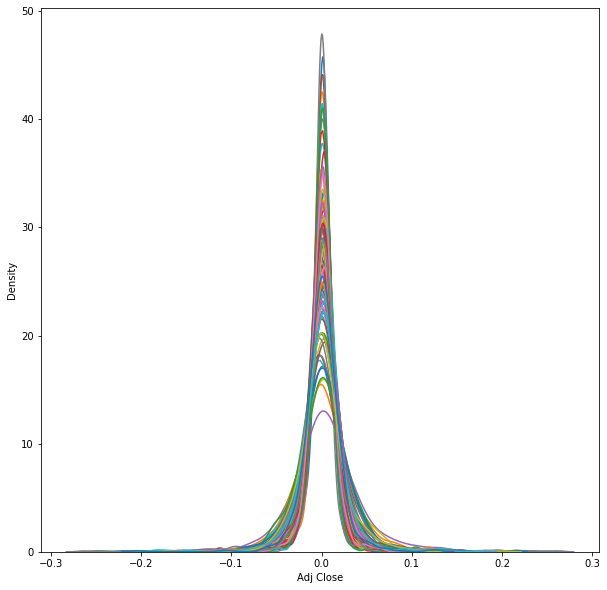

In [17]:
# 4. Using historic simulation
# import data
start = dt.datetime(2019, 1, 1)
end = dt.datetime.now()
stock_name = list(df2.columns)
df_yahoo = yf.download(stock_name, start, end)['Adj Close']

# Calculate VaR
return4 = df_yahoo.pct_change()
cov4 = return4.cov()
avg_return4 = return4.mean()
port_mean4 = avg_return4 @ weight1
port_std4 = np.sqrt(weight1.T @ cov4 @ weight1)
confidence_level = 0.05 
VaR4 = norm.ppf(confidence_level, port_mean4, port_std4)
print('The VaR value by using historic simulation is %f.' % VaR4)

plt.figure(figsize = (10,10))
for i in range(101):
    dataframe = yf.download(stock_name[i], start, end)['Adj Close']
    temp = dataframe.pct_change()
    sns.kdeplot(temp)
    
plt.show()

In [18]:
name = ['Normal Distribution', 'EWM', 'MLE', 'Historic Simulation']
var = [VaR1, VaR2, VaR3, VaR4]
result = pd.DataFrame(list(zip(name, var)), columns = ['Method','VaR'])
result

,Method,VaR
0,Normal Distribution,[[-0.012996771539563613]]
1,EWM,-0.010999
2,MLE,0 0 -0.014601
3,Historic Simulation,[[-0.02294909720592096]]


# Question 3

In [19]:
# Load Database
df_A = pd.read_csv("portfolio_A.csv")
df_B= pd.read_csv("portfolio_B.csv")
df_C = pd.read_csv("portfolio_C.csv")
df_total = pd.read_csv("portfolio.csv")
df_price = pd.read_csv("DailyPrices.csv")

In [20]:
# Function of calculate weight by using first day price
def cal_weight (data_hold, data_price):
    n = data_hold.shape[0]
    
    total = 0
    val = np.zeros((n,1))
    for i in range(n):
        name = data_hold.Stock[i]
        val[i] = data_price[name][0] * data_hold.Holding[i]
        total = total + val[i]
        
    weight = np.zeros((n,1))
    for j in range(n):
        weight[j] = val[j] / total
        
    return weight

In [21]:
# Calculate the weight
weight_A = cal_weight(df_A, df_price)
weight_B = cal_weight(df_B, df_price)
weight_C = cal_weight(df_C, df_price)

weight_total = cal_weight(df_total, df_price)

In [22]:
# Function of find out the price for each portfolio
def port_price (data_hold, data_price):
    n = data_hold.shape[0]
    m = data_price.shape[0]
    
    
    port = np.zeros((m,n))
    for i in range(n):
        name = data_hold.Stock[i]
        port[:,i] = data_price[name]
            
    return port

In [23]:
# Get the price for each portfolio
price_A = port_price(df_A, df_price)
price_B = port_price(df_B, df_price)
price_C = port_price(df_C, df_price)

price_total = port_price(df_total, df_price)

In [24]:
# Calculate the rate of return by using Arithmetic method
def ror_matrix (data):
    n = data.shape[0]
    m = data.shape[1]
    
    ror = np.zeros((n-1, m))
    for i in range(m):
        for j in range(n-1):
            ror[j][i] = (data[j+1][i] - data[j][i]) / data[j][i]
            
    return ror

In [25]:
# Calculate the ror of each 
ror_A = ror_matrix(price_A)
ror_B = ror_matrix(price_B)
ror_C = ror_matrix(price_C)

ror_total = ror_matrix(price_total)

In [26]:
# Calculate the covariance matrix for each ror
cov_A = np.cov(ror_A.T)
cov_B = np.cov(ror_B.T)
cov_C = np.cov(ror_C.T)

cov_total = np.cov(ror_total.T)

In [27]:
def cal_mean (data):
    n = data.shape[0]
    m = data.shape[1]
    
    avg = np.zeros((m,1))
    for i in range(m):
        avg[i] = data[:,i].mean()
        
    return avg

In [28]:
# Calculate the average return for each portfolio
avg_ror_A = cal_mean(ror_A)
avg_ror_B = cal_mean(ror_B)
avg_ror_C = cal_mean(ror_C)

avg_ror_total = cal_mean(ror_total)

In [29]:
# Calculate the portfolio mean and std

# Port_A
port_A_mean = avg_ror_A.T @ weight_A
port_A_std = np.sqrt(weight_A.T @ cov_A @ weight_A)

# Port_B
port_B_mean = avg_ror_B.T @ weight_B
port_B_std = np.sqrt(weight_B.T @ cov_B @ weight_B)

# Port_C
port_C_mean = avg_ror_C.T @ weight_C
port_C_std = np.sqrt(weight_C.T @ cov_C @ weight_C)


# Port_total
port_total_mean = avg_ror_total.T @ weight_total
port_total_std = np.sqrt(weight_total.T @ cov_total @ weight_total)

In [30]:
# Calculate VaR for each portfolio with confidence_level = 0.05
confidence_level = 0.05

VaR_A = norm.ppf(confidence_level, port_A_mean, port_A_std)
VaR_B = norm.ppf(confidence_level, port_B_mean, port_B_std)
VaR_C = norm.ppf(confidence_level, port_C_mean, port_C_std)

VaR_total = norm.ppf(confidence_level, port_total_mean, port_total_std)

In [31]:
name = ['Portfolio A', 'Portfolio B', 'Portfolio C', 'Portfolio Total']
var = [VaR_A, VaR_B, VaR_C, VaR_total]
result = pd.DataFrame(list(zip(name, var)), columns = ['Portfolio','VaR under alpha = 0.05'])
result

,Portfolio,VaR under alpha = 0.05
0,Portfolio A,[[-0.016101535570157737]]
1,Portfolio B,[[-0.014637540738180858]]
2,Portfolio C,[[-0.010411346833820211]]
3,Portfolio Total,[[-0.013394625158109992]]
